In [47]:
#https://github.com/aritzLizoain/Image-Classification/tree/main/Code
def ImageClassification(path):

#Import Libraries

    import os
    import sklearn
    import skimage
    from pathlib import Path
    import numpy as np
    from sklearn.utils import Bunch
    from skimage.io import imread
    from skimage.transform import resize
   

#Description of the dataset

    descr = "Image Classification Using Machine Learning Algorithms"

    def load_image_files(container_path,dimension=(224,224,3)):
        image_dir=Path(container_path)
        folders=[directory for directory in image_dir.iterdir()if directory.is_dir()]
        categories=[fo.name for fo in folders]
        describe="Image Classification Using Machine Learning Algorithms"
        images=[]
        flat_data=[]
        target=[]

        for i,direc in enumerate(folders):
            for file in direc.iterdir():
                img=skimage.io.imread(file)
                img_resized=resize(img,dimension, anti_aliasing=True, mode='reflect')
                flat_data.append(img_resized.flatten())
                images.append(img_resized)
                target.append(i)
        flat_data=np.array(flat_data)
        target=np.array(target)
        images=np.array(images)
        return Bunch(data=flat_data, target=target, target_names=categories, images=images, DESCR=describe)

    image_dataset=load_image_files(path)
    print(image_dataset.target_names)

    X=image_dataset.data
    Y=image_dataset.target

    print(X)
    print(Y)

    return(X,Y)

In [48]:
#Training Datasets

def TrainData(X,Y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4) #60% training and 40% test
    return (X_train, X_test, y_train, y_test)

In [49]:
#Machine Learning Models

def Algo(X_train, X_test, y_train,y_test):
    

  def KNN():
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn import metrics
    #Create KNN Classifier
    global knn
    knn = KNeighborsClassifier(n_neighbors=5)
    #Train the model using the traini|ng sets
    knn.fit(X_train, y_train)
    #Predict the response for test dataset
    y_pred = knn.predict(X_test)
    print("\nKNN Algorithm\n")
    #Calling Metrics Function
    Metrics(y_test, y_pred)
    

  def DT():
    from sklearn.tree import DecisionTreeClassifier
    #Create Decision Tree classifer object
    global dt
    dt = DecisionTreeClassifier()
    #Train Decision Tree Classifer
    dt = dt.fit(X_train,y_train)
    #Predict the response for test dataset
    y_pred = dt.predict(X_test)
    print("Decision Tree Algorithm\n")
    #Calling Metrics Function
    Metrics(y_test, y_pred)
    

  def GNB():
    #Import Gaussian Naive Bayes model
    from sklearn.naive_bayes import GaussianNB
    from sklearn import metrics
    #Create a Gaussian Classifier
    global gnb
    gnb = GaussianNB()
    #Train the model using the training sets
    gnb.fit(X_train, y_train)
    #Predict the response for test dataset
    y_pred = gnb.predict(X_test)
    print("Gaussian Naive Bayes Algorithm\n")
    #Calling Metrics Function
    Metrics(y_test, y_pred)
    

  def SVM():

    #Import SVM model
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC
    from sklearn import metrics
    #Create a SVM Classifier
    global svm
    svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    #Train the model using the training sets
    svm.fit(X_train, y_train)
    #Predict the response for test dataset
    y_pred = svm.predict(X_test)
    print("SVM Algorithm\n")
    #Calling Metrics Function
    Metrics(y_test, y_pred)

    
  def ANN():
    #Import ANN model
    from sklearn.neural_network import MLPClassifier
    from sklearn.datasets import make_classification
    from sklearn import metrics
    #Create a ANN Classifier
    global ann
    ann = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
    #Predict the response for test dataset
    y_pred = ann.predict(X_test)
    print("ANN Algorithm\n")
    #Calling Metrics Function
    Metrics(y_test, y_pred)

  #Calling ML Models

  Algorithms = [KNN, DT, GNB, SVM, ANN]
  for i in Algorithms:
    i()
    print("\n")

  print(f"{A}\n")

In [50]:
def Metrics(y_test,y_pred):
  
  #Importing Modules

  from sklearn import metrics
  from sklearn.metrics import classification_report
  from sklearn.metrics import confusion_matrix
  import matplotlib.pyplot as plt
  import scikitplot as skplt

  #Accuracy
  
  a = metrics.accuracy_score(y_test, y_pred)
  A.append(a*100)
  print("Accuracy: ", a*100)
  print("\nOther Metrics Score\n")
  print(classification_report(y_test, y_pred))
  print("\n")
  
  #Confusion Matrix

  print("\nConfusion Matrix\n")
  data = confusion_matrix(y_test, y_pred)
  print(data)
  print("\n")
  skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(6,6))

In [51]:
def Ranking(A):
    
    import numpy as np
    from scipy.stats import rankdata

    global Rank
    global RankCount

    PlotGraph(A)
    arr = np.array(A)

    # Normal ranking, each value has distinct rank

    ranklist=rankdata(arr, method='ordinal')
    print(f"ML Algo Ranking: {ranklist}\n")

    
    Rank.append(ranklist)
    RankCount+=1
    if(RankCount == n):
        RankingList = np.sum(Rank, axis=0)
        print("\nAggregate sum of ranking of ML models")
        print(list(RankingList))
        
        #Calling PlotGraph Function to show the accuracy measures of various ML Models

        PlotRank(RankingList)

In [52]:
def PlotGraph(A):

    #Importing modules

    import numpy as np
    from scipy.stats import rankdata
    import matplotlib.pyplot as plt

    Algorithms = ['KNN', 'DT', 'GNB', 'SVM','NB']
    Accuracy = A
    fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
    
    plt.bar(Algorithms, Accuracy, color ='maroon',width = 0.4)
    plt.ylim(0,max(Accuracy)+1)
    plt.xlabel("ML Classification Algorithms")
    plt.ylabel("Accuracy")
    plt.title("Comparative analysis of various ML models")
    plt.show()

In [53]:
def PlotRank(updatedrank):

    #Importing modules

    import numpy as np
    from scipy.stats import rankdata
    import matplotlib.pyplot as plt
    #Creating the dataset
    Algorithms = ['KNN', 'DT', 'GNB', 'SVM','NB']
    fig = plt.figure(figsize = (10, 5))
    updatedranking = np.array(updatedrank)
    finalranking=[]
    #Normal ranking; each value has distinct rank
    ordinalranklist=rankdata(updatedrank,method='ordinal')
    for i in ordinalranklist:
        finalranking.append((len(Algorithms)-(i-1)))

    print(f"\nRanking of ML Algorithms based on given datasets: {finalranking}")
    print("\n ML Ranking Bar Graph")

    #Creating the bar plot

    plt.bar(Algorithms, finalranking, color ='green',width = 0.4)
    plt.ylim(0,len(Algorithms)+1)
    plt.xlabel("ML Classification Algorithms")
    plt.ylabel("Rank")
    plt.title("Comparative analysis on various ML Algo")
    plt.show()
    print("\n")

['cars', 'planes']
[[0.1372549  0.22745098 0.29803922 ... 0.85882353 0.90588235 0.96862745]
 [0.64705882 0.70588235 0.7254902  ... 0.64313725 0.70196078 0.72156863]
 [0.77647059 0.89019608 0.90588235 ... 0.98039216 0.94901961 0.8745098 ]
 ...
 [0.99215686 0.99607843 0.97254902 ... 0.36078431 0.34117647 0.22745098]
 [0.6745098  0.67843137 0.68627451 ... 0.70588235 0.67058824 0.63529412]
 [0.99607843 0.99607843 0.99607843 ... 0.78431373 0.76470588 0.74901961]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1

C:\Users\DELL\anaconda3\envs\rr_tfd\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\envs\rr_tfd\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\envs\rr_tfd\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


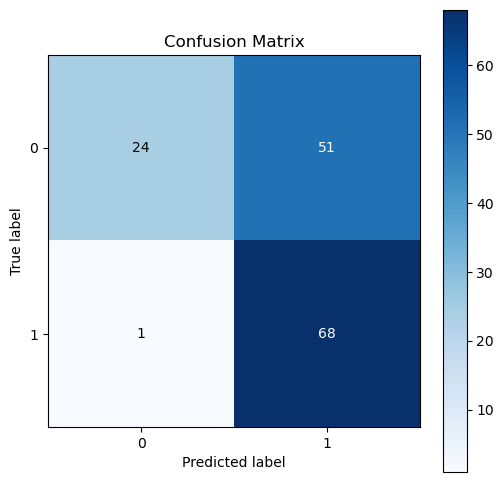

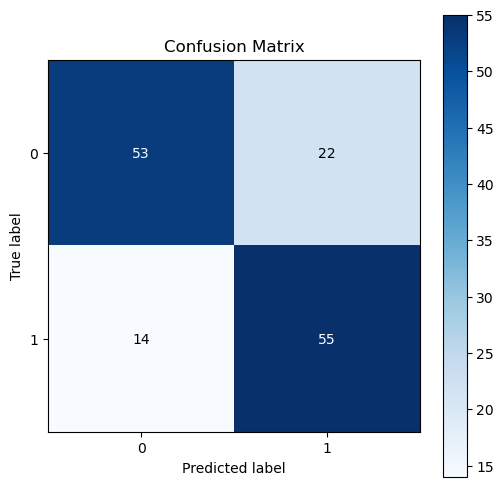

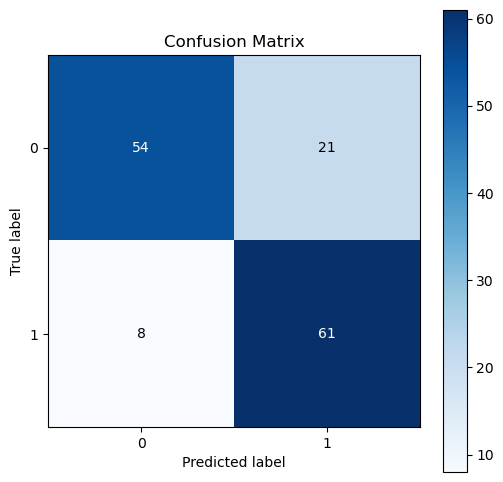

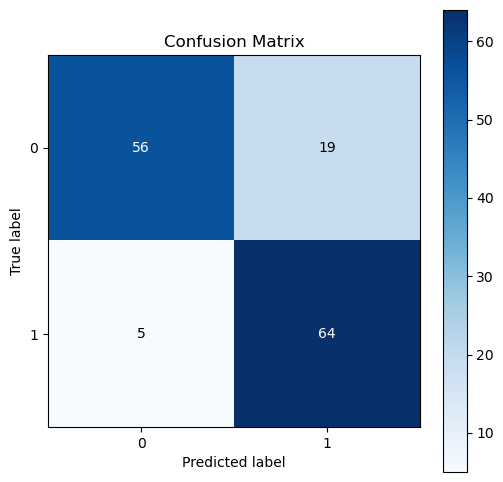

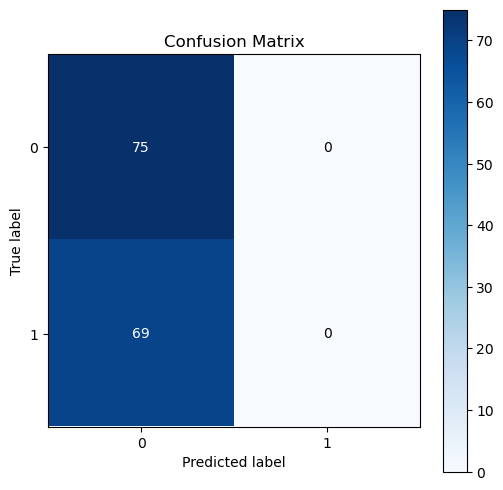

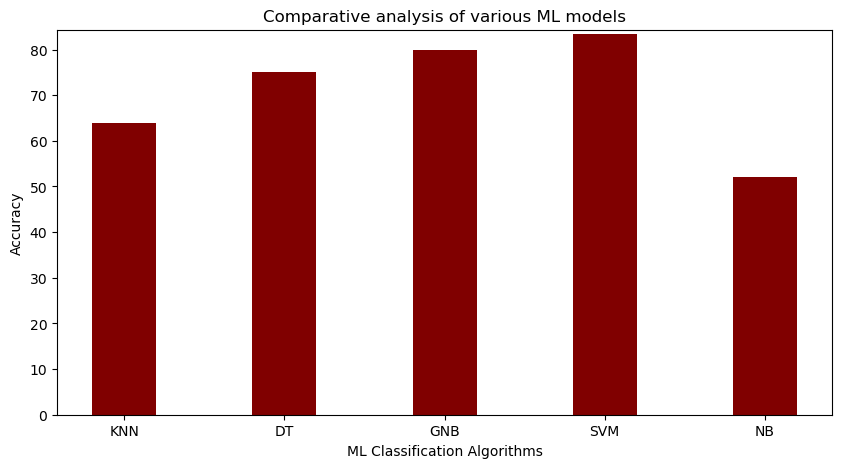

ML Algo Ranking: [2 3 4 5 1]


Aggregate sum of ranking of ML models
[2, 3, 4, 5, 1]

Ranking of ML Algorithms based on given datasets: [4, 3, 2, 1, 5]

 ML Ranking Bar Graph


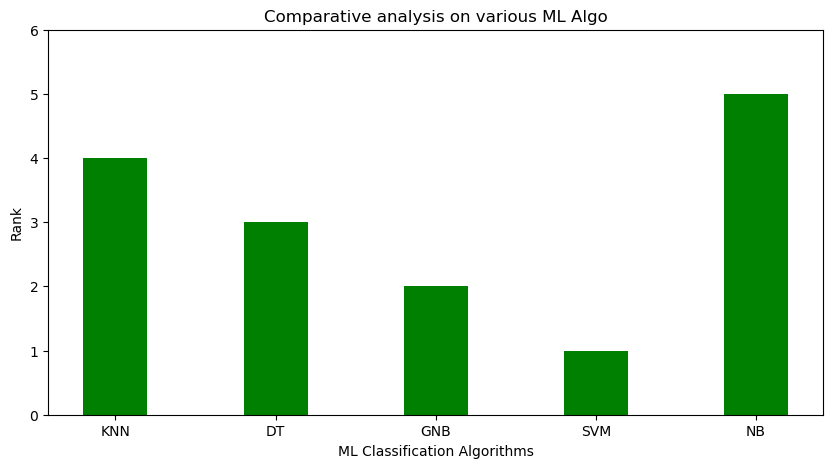

In [54]:
#Train - Enter the directory path

path = "C:\\Users\\DELL\\Desktop\\Image Classification\\V_data\\train"
#pip install scikit-image
#pip install scikit-plot
#Accuracy List

A=[]
Rank=[]
RankCount=0
n=1

#Passing the required parameters

X,Y=ImageClassification(path)
X_train, X_test, y_train, y_test = TrainData(X,Y)
Algo(X_train, X_test, y_train, y_test)
Ranking(A)

In [55]:
#Test - Enter the directory path

path = "C:\\Users\\DELL\\Desktop\\Image Classification\\V_data\\test"
#pip install scikit-image
#pip install scikit-plot
#Accuracy List

A=[]
Rank=[]
RankCount=0
n=1

#Passing the required parameters

X,Y=ImageClassification(path)


['cars', 'planes']
[[0.53333333 0.63921569 0.82352941 ... 0.         0.         0.        ]
 [0.90588235 0.9254902  0.94117647 ... 0.11372549 0.1254902  0.14509804]
 [0.78039216 0.87843137 0.86666667 ... 0.23137255 0.23921569 0.21960784]
 ...
 [0.47058824 0.59607843 0.65490196 ... 0.54901961 0.60392157 0.55294118]
 [0.05098039 0.14901961 0.96078431 ... 0.11372549 0.23921569 1.        ]
 [0.69411765 0.69411765 0.74117647 ... 0.32156863 0.31764706 0.30980392]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [56]:
#Machine Learning Models

def Algo1(X_test,y_test):

  def KNN():
   
    y_pred = knn.predict(X_test)
    print("\nKNN Algorithm\n")
    #Calling Metrics Function
    Metrics(y_test, y_pred)
    

  def DT():
    
    y_pred = dt.predict(X_test)
    print("Decision Tree Algorithm\n")
    #Calling Metrics Function
    Metrics(y_test, y_pred)
    

  def GNB():
    
    y_pred = gnb.predict(X_test)
    print("Gaussian Naive Bayes Algorithm\n")
    #Calling Metrics Function
    Metrics(y_test, y_pred)
    

  def SVM():

   
    y_pred = svm.predict(X_test)
    print("SVM Algorithm\n")
    #Calling Metrics Function
    Metrics(y_test, y_pred)

    
  def ANN():
    
    y_pred = ann.predict(X_test)
    print("ANN Algorithm\n")
    #Calling Metrics Function
    Metrics(y_test, y_pred)

  #Calling ML Models

  Algorithms = [KNN, DT, GNB, SVM, ANN]
  for i in Algorithms:
    i()
    print("\n")

  print(f"{A}\n")


KNN Algorithm

Accuracy:  68.0

Other Metrics Score

              precision    recall  f1-score   support

           0       1.00      0.36      0.53        50
           1       0.61      1.00      0.76        50

    accuracy                           0.68       100
   macro avg       0.80      0.68      0.64       100
weighted avg       0.80      0.68      0.64       100




Confusion Matrix

[[18 32]
 [ 0 50]]




Decision Tree Algorithm

Accuracy:  69.0

Other Metrics Score

              precision    recall  f1-score   support

           0       0.71      0.64      0.67        50
           1       0.67      0.74      0.70        50

    accuracy                           0.69       100
   macro avg       0.69      0.69      0.69       100
weighted avg       0.69      0.69      0.69       100




Confusion Matrix

[[32 18]
 [13 37]]




Gaussian Naive Bayes Algorithm

Accuracy:  83.0

Other Metrics Score

              precision    recall  f1-score   support

           0    

C:\Users\DELL\anaconda3\envs\rr_tfd\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\envs\rr_tfd\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\envs\rr_tfd\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


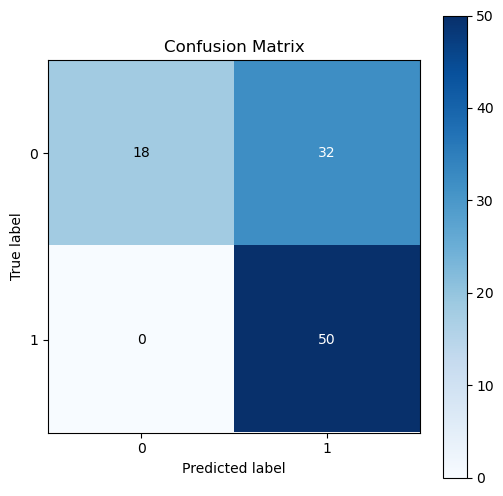

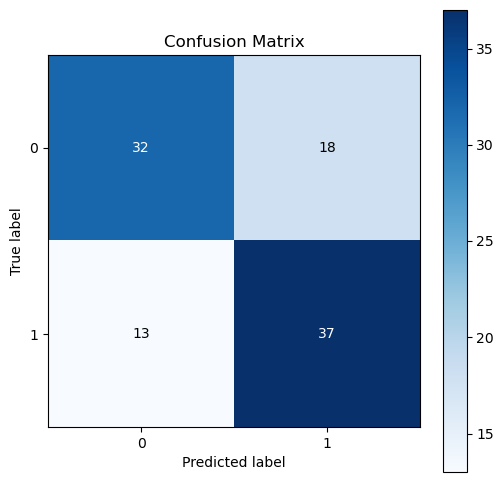

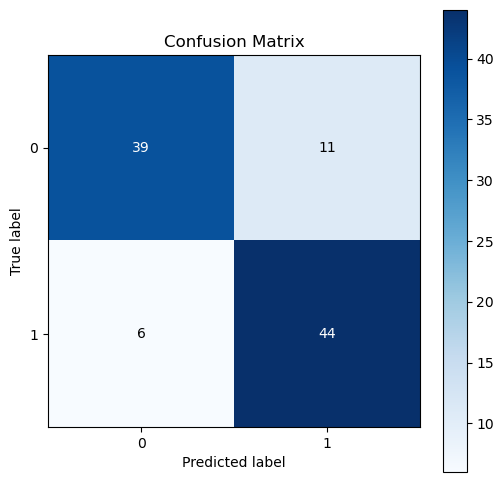

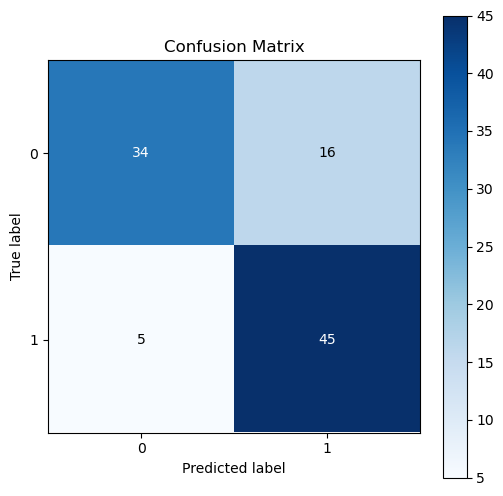

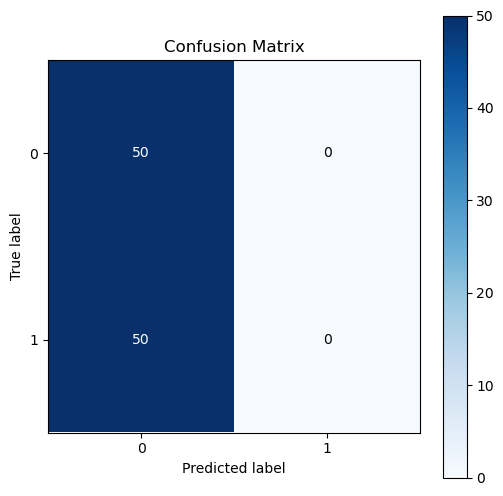

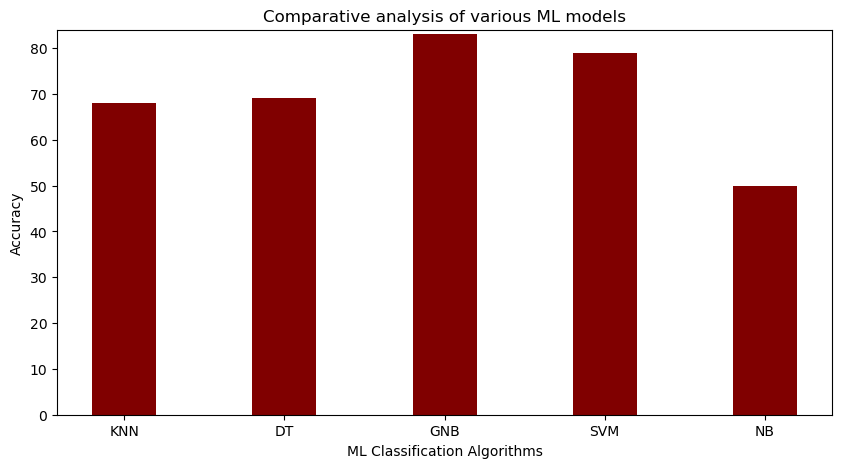

ML Algo Ranking: [2 3 5 4 1]


Aggregate sum of ranking of ML models
[2, 3, 5, 4, 1]

Ranking of ML Algorithms based on given datasets: [4, 3, 1, 2, 5]

 ML Ranking Bar Graph


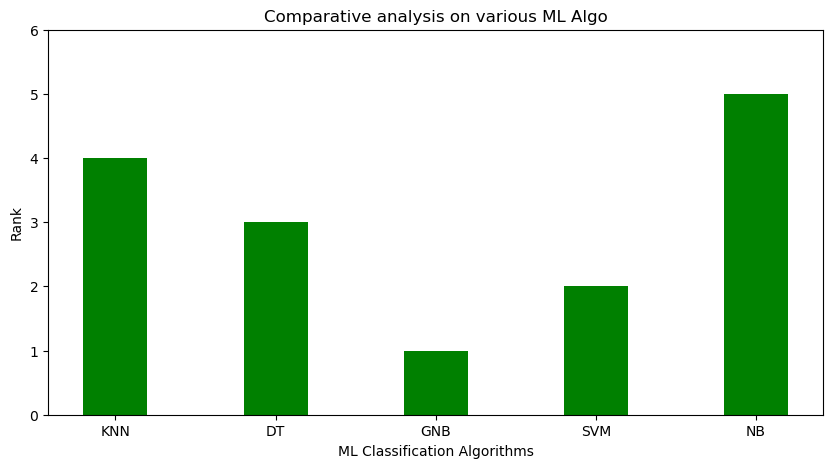

In [57]:

Algo1(X,Y)
Ranking(A)